In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")

In [28]:
df_field["Taxon_ID"].value_counts().shape

(114,)

In [29]:
# pd.set_option('max_rows', None)
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


In [30]:
# Create a pandas df from csv
df_matrix = pd.read_csv("/data/Copia di Copia di matrice Marko-3_Martin.csv", header=0, index_col=0, sep=";")
#df.drop(df.columns[-1:], axis=1, inplace=True)
df_matrix

FileNotFoundError: [Errno 2] No such file or directory: '/data/Copia di Copia di matrice Marko-3_Martin.csv'

In [19]:
# Create a graph from df by reading as adjacency matrix
#G = nx.from_pandas_adjacency(df_matrix)
G = nx.from_pandas_adjacency(df_matrix, create_using=nx.DiGraph)
# G = nx.DiGraph.reverse(G_rev)
G.name = "Graph from soil food web adjacency matrix"
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 136 edges


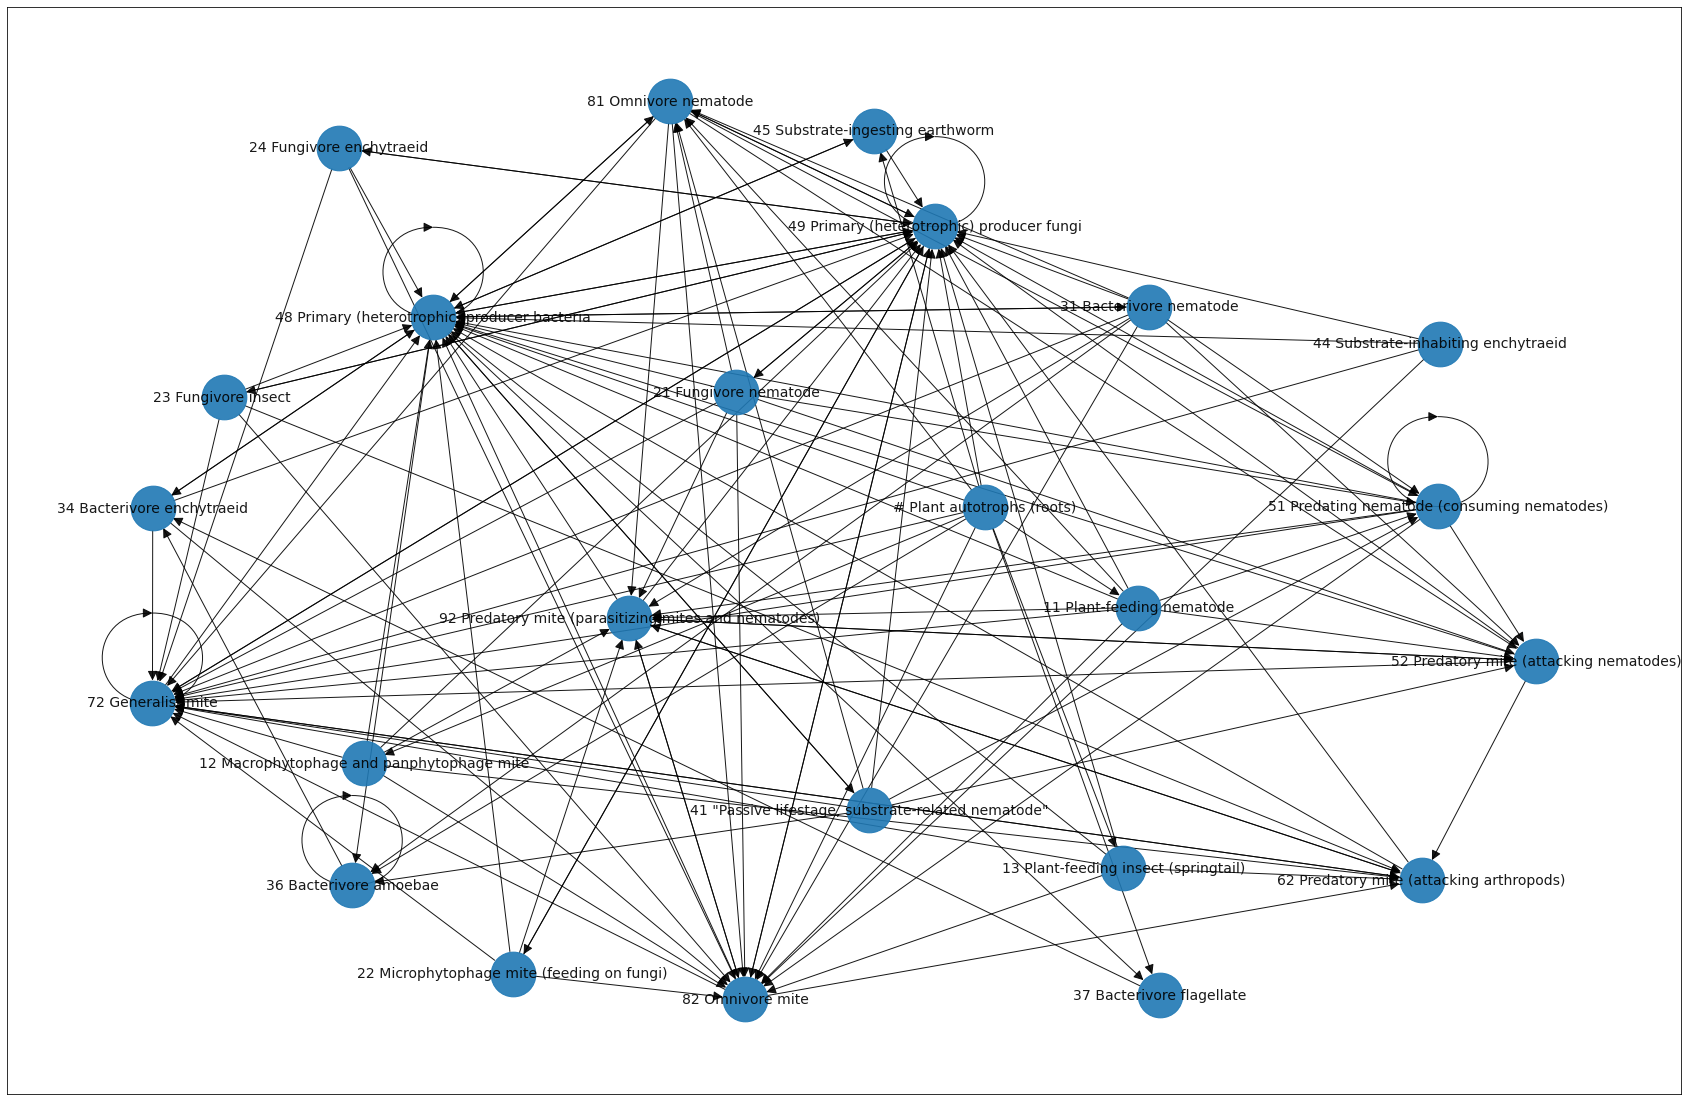

In [23]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=20, node_size=2000, alpha=0.9, font_size=14)
f.savefig("sf_network_2")

In [24]:
print(f"num of nodes: {G.number_of_nodes()}, num of edges: {G.number_of_edges()}, num of avg node degree {G.number_of_edges() / G.number_of_nodes():.2f}")

num of nodes: 24, num of edges: 136, num of avg node degree 5.67


In [25]:
# Get the PageRank
pr = nx.pagerank(G)
# Sort by key value
sorted(pr.items(), key=lambda item: item[1], reverse=True)

[('48 Primary (heterotrophic) producer bacteria', 0.1501403907634017),
 ('49 Primary (heterotrophic) producer fungi', 0.1501403907634017),
 ('72 Generalist mite', 0.11811773408520188),
 ('82 Omnivore mite', 0.06932663908096814),
 ('62 Predatory mite (attacking arthropods)', 0.06284124108611891),
 ('34 Bacterivore enchytraeid', 0.058968624530919125),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.05339136516339751),
 ('36 Bacterivore amoebae', 0.04627901645737003),
 ('81 Omnivore nematode', 0.04207267240112669),
 ('52 Predatory mite (attacking nematodes)', 0.030275248371399555),
 ('37 Bacterivore flagellate', 0.02220081443956587),
 ('51 Predating nematode (consuming nematodes)', 0.02119895807646418),
 ('45 Substrate-ingesting earthworm', 0.020626740365491798),
 ('31 Bacterivore nematode', 0.020429981106232536),
 ('23 Fungivore insect\xa0', 0.020429981106232536),
 ('24 Fungivore enchytraeid', 0.020429981106232536),
 ('21 Fungivore nematode', 0.020429981106232536),
 ('41 "Pas

# Prepare the node features

#### 

In [190]:
# Add biomas as attribute

In [ ]:
# ali je biomasa nad 10% biomase s katerimi se prehranjujeo (verjetno edge attribute)